point cloud data is stored as a 2D matrix
each row has 3 values i.e. the x, y, z value for a point

Project has to be submitted to github in the private folder assigned to you
Readme file should have the numerical values as described in each task
Create a folder to store the images as described in the tasks.

Try to create commits and version for each task.

In [1]:
import matplotlib
import numpy as np
from scipy.spatial import KDTree
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

from sklearn.mixture import GaussianMixture

In [2]:
#%% utility functions
def show_cloud(points_plt):
    ax = plt.axes(projection='3d')
    ax.scatter(points_plt[:,0], points_plt[:,1], points_plt[:,2], s=0.01)
    plt.show()

def show_scatter(x,y):
    plt.scatter(x, y)
    plt.show()

def get_ground_level(pcd, dataset):

    z_vals = pcd[:, 2].reshape(-1, 1) # extract z values 
    # fit a 2 component GMM: one for ground/tracks, one for elevated structures
    gmm = GaussianMixture(n_components=2, random_state=0) 
    gmm.fit(z_vals)
    means = gmm.means_.flatten() # convert 2D array to 1D
    ground_mean = np.min(means)  # lower mean is ground/tracks
    elevated_mean = np.max(means)
    # boundary between ground and elevated
    boundary = (ground_mean + elevated_mean) / 2

    print(f"{dataset}: ground mean = {ground_mean}")
    print(f"{dataset}: elevated mean = {elevated_mean}")
    print(f"{dataset}: semantic threshold = {boundary}")

    plt.hist(z_vals, bins=100)
    plt.axvline(ground_mean, color='red', linestyle='--', linewidth=1.5, label='Ground mean')
    plt.axvline(elevated_mean, color='green', linestyle='--', linewidth=1.5, label='Elevated mean')
    plt.axvline(boundary, color='blue', linestyle='--', linewidth=1.5, label='Semantic threshold')
    plt.xlabel('Height (z)')
    plt.ylabel('Number of points')
    plt.title(f'{dataset}: Height Distribution to Find Ground Level')
    plt.legend()
    plt.show()

    # Mask for points above the semantic threshold
    mask = pcd[:,2] > boundary
    return mask, boundary

In [3]:
#%% read file containing point cloud data
pcd = np.load("dataset1.npy")

pcd.shape

(72067, 3)

In [4]:
pcd2 = np.load("dataset2.npy")

pcd2.shape

(84588, 3)

In [5]:
pcd[:5]  # [x,y,z] aka 0,1,2

array([[31.405, 80.054, 61.247],
       [30.961, 80.243, 61.185],
       [30.599, 80.412, 61.174],
       [30.258, 80.577, 61.145],
       [33.393, 80.217, 61.218]])

In [6]:
pcd2[:5]

array([[1.17020000e+01, 3.99999972e-03, 6.11420000e+01],
       [1.19060000e+01, 3.04000000e-01, 6.11520000e+01],
       [1.40860000e+01, 3.00000003e-02, 6.11040000e+01],
       [1.19350000e+01, 6.48000000e-01, 6.11070000e+01],
       [1.28780000e+01, 5.88000000e-01, 6.11780000e+01]])

In [7]:
# show z values
pcd[:5, 2] # first 5 rows of the z column

array([61.247, 61.185, 61.174, 61.145, 61.218])

In [8]:
#%% show downsampled data in external window
%matplotlib inline
#show_cloud(pcd)
#show_cloud(pcd[::2]) # keep every 10th point

Dataset 1: ground mean = 61.26906038444822
Dataset 1: elevated mean = 67.41653964548783
Dataset 1: semantic threshold = 64.34280001496802


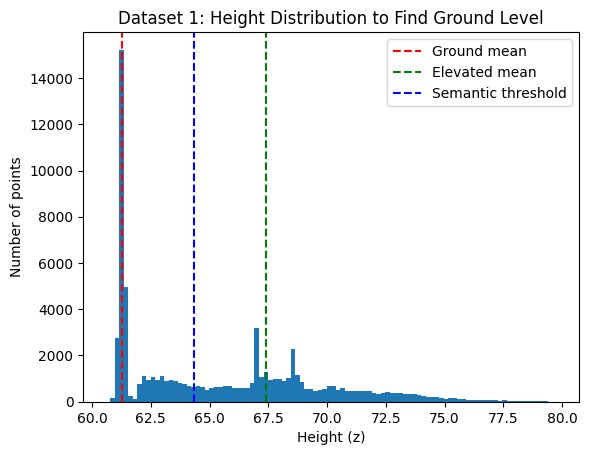

Dataset 2: ground mean = 61.23265779119356
Dataset 2: elevated mean = 67.44447711757516
Dataset 2: semantic threshold = 64.33856745438436


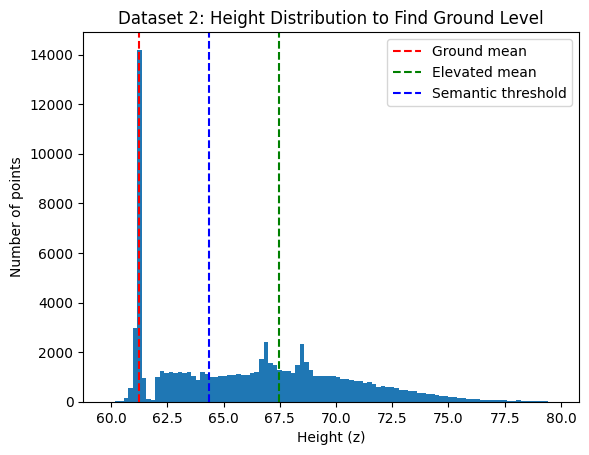

In [9]:
'''
Task 1 (3)
find the best value for the ground level
One way to do it is useing a histogram 
np.histogram

update the function get_ground_level() with your changes

For both the datasets
Report the ground level in the readme file in your github project
Add the histogram plots to your project readme
'''

# dataset 1
mask1, threshold1 = get_ground_level(pcd, "Dataset 1")
pcd_above_ground = pcd[mask1]

# dataset 2
mask2, threshold2 = get_ground_level(pcd2, "Dataset 2")
pcd2_above_ground = pcd2[mask2]

In [10]:
pcd_above_ground.shape

(37376, 3)

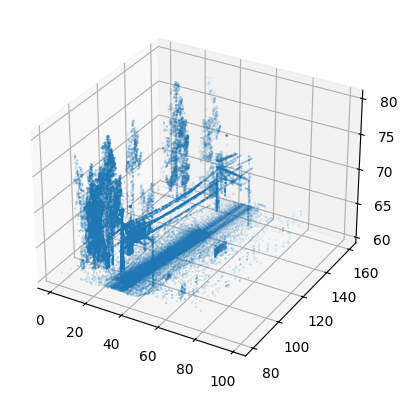

In [11]:
# original Dataset 1
show_cloud(pcd)

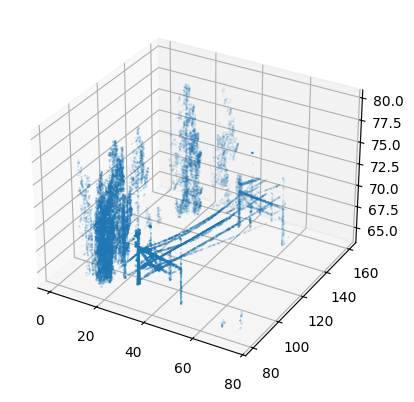

In [12]:
#%% side view
# after ground removal Dataset 1
show_cloud(pcd_above_ground)

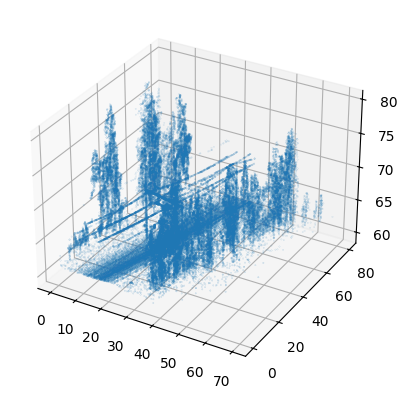

In [13]:
# Dataset 2 before ground removal
#%% show downsampled data in external window
%matplotlib inline
show_cloud(pcd2)
#show_cloud(pcd2[::10]) # keep every 10th point

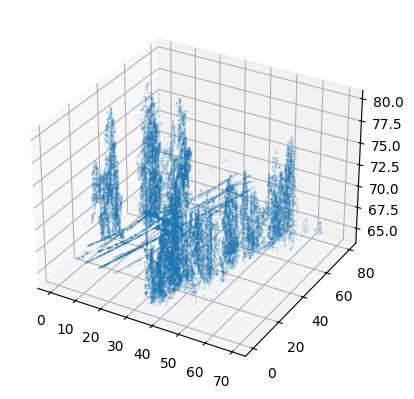

In [14]:
#%% Datset 2 side view, after ground removal
show_cloud(pcd2_above_ground)